# TP : Prise en main de l'API Codecarbon

## Imports

In [1]:
!pip install codecarbon
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import time

from sklearn.metrics import accuracy_score

SEED = 42

# Méthode 1 : start/stop

In [3]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker(save_to_file=False, log_level="critical")
tracker.start()

""" insert your code here """

emissions: float = tracker.stop() * 1000

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



# TP : Intégrer le monitoring dans un notebook classique de ML

## Création d'un dataset d'exemple
Ceci est un exemple, vous pouvez très bien changer de dataset :).

In [4]:
# make classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000, n_features=30, n_informative=20, n_redundant=10, random_state=SEED
)

# split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

## Partie preprocessing : Training
Libre à vous de modifier le feature engineering.

In [5]:
# pca for dimensionality reduction
from sklearn.decomposition import PCA

start = time.time()

tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
tracker.start()  # correction

pca = PCA(n_components=20, random_state=SEED)
X_train_pca = pca.fit_transform(X_train)
pca_time = time.time() - start
print(f"PCA time: {pca_time}")

pca_emissions: float = tracker.stop() * 1000  # correction

# preprocess data
from sklearn.preprocessing import StandardScaler

start = time.time()

tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
tracker.start()  # correction

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
scaler_time = time.time() - start
print(f"Scaler time: {scaler_time}")

scaler_emissions: float = tracker.stop() * 1000  # correction

preprocess_time = pca_time + scaler_time

preprocess_emissions = pca_emissions + scaler_emissions  # correction

print(f"PCA emissions: {pca_emissions}")  # correction
print(f"Scaler emissions: {scaler_emissions}")  # correction

PCA time: 2.2821199893951416


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Scaler time: 2.0178518295288086
PCA emissions: 1.7492414438724517e-05
Scaler emissions: 6.58962376912435e-07


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



## Partie preprocessing : Inference

In [6]:
start = time.time()

tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
tracker.start()  # correction

X_test_pca = pca.transform(X_test)

pca_inf_emissions: float = tracker.stop() * 1000  # correction

tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
tracker.start()  # correction
X_test_scaled = scaler.transform(X_test_pca)
scaler_inf_emissions: float = tracker.stop() * 1000  # correction

preprocess_inf_time = time.time() - start

preprocess_inf_emissions = pca_inf_emissions + scaler_inf_emissions  # correction
print(
    f"Preprocess inference time (1000 samples): {preprocess_inf_time * 1000 / len(X_test)}"
)

print(f"Preprocess inference emissions: {preprocess_inf_emissions}")  # correction

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Preprocess inference time (1000 samples): 1.8035228729248047
Preprocess inference emissions: 5.356211582819621e-07


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



## Définition des modèles à tester
Libre à vous de changer de modèles etc..

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

base_models = {
    "RF": {
        "model": RandomForestClassifier(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": {
            "preprocess_train": 0,
            "preprocess_inference": 0,
            "train": 0,
            "inference": 0,
        },
    },
    "LR": {
        "model": LogisticRegression(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": {
            "preprocess_train": 0,
            "preprocess_inference": 0,
            "train": 0,
            "inference": 0,
        },
    },
    "SVC": {
        "model": SVC(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": {
            "preprocess_train": 0,
            "preprocess_inference": 0,
            "train": 0,
            "inference": 0,
        },
    },
    "MLP": {
        "model": MLPClassifier(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": {
            "preprocess_train": 0,
            "preprocess_inference": 0,
            "train": 0,
            "inference": 0,
        },
    },
}

preprocessed_models = deepcopy(base_models)
for model_name, model_dict in preprocessed_models.items():
    model_dict["carbon_emissions"]["preprocess_train"] = preprocess_emissions
    model_dict["carbon_emissions"]["preprocess_inference"] = preprocess_inf_emissions

# Entraînement

## Sans feature engineering

In [19]:
for model_name, model_dict in base_models.items():
    print(f"Training {model_name}")
    model = model_dict["model"]
    start = time.time()

    tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
    tracker.start()  # correction

    model.fit(X_train, y_train)

    model_dict["carbon_emissions"]["train"] = tracker.stop() * 1000  # correction

    end = time.time()
    model_dict["train_time"] = end - start
    print("Model trained in", model_dict["train_time"], "seconds")

Training RF


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 10.928742170333862 seconds
Training LR


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 3.591836929321289 seconds
Training SVC


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 3.9525680541992188 seconds
Training MLP
Model trained in 11.62950587272644 seconds


/Users/camille.hascoet/Documents/greenai/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



## Avec feature engineering

In [20]:
for model_name, model_dict in preprocessed_models.items():
    print(f"Training {model_name}")
    model = model_dict["model"]
    start = time.time()

    tracker = EmissionsTracker(save_to_file=False, log_level="critical")  # correction
    tracker.start()  # correction

    model.fit(X_train_scaled, y_train)

    model_dict["carbon_emissions"]["train"] = tracker.stop() * 1000  # correction

    end = time.time()
    model_dict["train_time"] = end - start + preprocess_time
    print("Model trained in", model_dict["train_time"], "seconds")

Training RF


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 10.86876368522644 seconds
Training LR


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 9.31575894355774 seconds
Training SVC


ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



Model trained in 8.472264051437378 seconds
Training MLP
Model trained in 14.187283039093018 seconds


/Users/camille.hascoet/Documents/greenai/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



# Méthode 2 : Décorateur

In [21]:
from codecarbon import track_emissions


@track_emissions(project_name="project_to_track", experiment_id=hash)
def function_to_track():
    """Insert your code here"""

    return


# Run function
function_to_track()

# Access emissions informations
pd.read_csv("./emissions.csv").tail(1)

[codecarbon INFO @ 17:04:55] [setup] RAM Tracking...
[codecarbon INFO @ 17:04:55] [setup] GPU Tracking...
[codecarbon INFO @ 17:04:55] No GPU found.
[codecarbon INFO @ 17:04:55] [setup] CPU Tracking...
[codecarbon INFO @ 17:04:55] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 17:04:57] >>> Tracker's metadata:
[codecarbon INFO @ 17:04:57]   Platform system: macOS-14.5-x86_64-i386-64bit
[codecarbon INFO @ 17:04:57]   Python version: 3.12.2
[codecarbon INFO @ 17:04:57]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 17:04:57]   Available RAM : 16.000 GB
[codecarbon INFO @ 17:04:57]   CPU count: 8
[codecarbon INFO @ 17:04:57]   CPU model: Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz
[codecarbon INFO @ 17:04:57]   GPU count: None
[codecarbon INFO @ 17:04:57]   GPU model: None
[codecarbon INFO @ 17:04:57] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:04:57] Energy consumed for RAM : 0.000000 kWh. RAM Power : 6.0 W
ERROR: Failed

timestamp      project_name  \
20  2024-05-23T17:04:58  project_to_track   

                                  run_id  duration     emissions  \
20  78ef5177-abee-459a-a81e-ead5c57b2531  0.189549  1.212793e-10   

    emissions_rate  cpu_power  gpu_power  ram_power  cpu_energy  ...  \
20    6.398309e-10        0.0        0.0        6.0         0.0  ...   

    cpu_count                                 cpu_model  gpu_count gpu_model  \
20          8  Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz        NaN       NaN   

   longitude latitude  ram_total_size  tracking_mode on_cloud  pue  
20    2.3965  48.6735            16.0        machine        N  1.0  

[1 rows x 31 columns]

# Inférence

In [22]:
@track_emissions(project_name="tp_codecarbon", experiment_id=hash)  # correction
def evaluate_model(model, X_test, y_test, preprocessed: bool = False):
    start = time.time()
    y_pred = model.predict(X_test_scaled if preprocessed else X_test)
    end = time.time()
    inference_time = (
        (end - start + preprocess_inf_time) if preprocessed else (end - start)
    )
    score = accuracy_score(y_test, y_pred)
    return score, inference_time

## Sans feature engineering

In [23]:
for model_name, model_dict in base_models.items():
    model = model_dict["model"]
    score, inference_time = evaluate_model(model, X_test, y_test)

    emissions = (
        pd.read_csv("./emissions.csv").tail(1)["emissions"].values[0] * 1000
    )  # correction
    model_dict["carbon_emissions"]["inference"] = emissions  # correction

    model_dict["score"] = score
    model_dict["inference_time"] = inference_time

[codecarbon INFO @ 17:04:58] [setup] RAM Tracking...
[codecarbon INFO @ 17:04:58] [setup] GPU Tracking...
[codecarbon INFO @ 17:04:58] No GPU found.
[codecarbon INFO @ 17:04:58] [setup] CPU Tracking...
[codecarbon INFO @ 17:04:58] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 17:04:59] >>> Tracker's metadata:
[codecarbon INFO @ 17:04:59]   Platform system: macOS-14.5-x86_64-i386-64bit
[codecarbon INFO @ 17:04:59]   Python version: 3.12.2
[codecarbon INFO @ 17:04:59]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 17:04:59]   Available RAM : 16.000 GB
[codecarbon INFO @ 17:04:59]   CPU count: 8
[codecarbon INFO @ 17:04:59]   CPU model: Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz
[codecarbon INFO @ 17:04:59]   GPU count: None
[codecarbon INFO @ 17:04:59]   GPU model: None
[codecarbon INFO @ 17:05:00] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:05:00] Energy consumed for RAM : 0.000000 kWh. RAM Power : 6.0 W
ERROR: Failed

## Avec feature engineering

In [24]:
for model_name, model_dict in preprocessed_models.items():
    model = model_dict["model"]
    score, inference_time = evaluate_model(
        model, X_test_scaled, y_test, preprocessed=True
    )

    emissions = (
        pd.read_csv("./emissions.csv").tail(1)["emissions"].values[0] * 1000
    )  # correction
    model_dict["carbon_emissions"]["inference"] = emissions  # correction

    model_dict["score"] = score
    model_dict["inference_time"] = inference_time

[codecarbon INFO @ 17:05:12] [setup] RAM Tracking...
[codecarbon INFO @ 17:05:12] [setup] GPU Tracking...
[codecarbon INFO @ 17:05:12] No GPU found.
[codecarbon INFO @ 17:05:12] [setup] CPU Tracking...
[codecarbon INFO @ 17:05:12] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 17:05:15] >>> Tracker's metadata:
[codecarbon INFO @ 17:05:15]   Platform system: macOS-14.5-x86_64-i386-64bit
[codecarbon INFO @ 17:05:15]   Python version: 3.12.2
[codecarbon INFO @ 17:05:15]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 17:05:15]   Available RAM : 16.000 GB
[codecarbon INFO @ 17:05:15]   CPU count: 8
[codecarbon INFO @ 17:05:15]   CPU model: Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz
[codecarbon INFO @ 17:05:15]   GPU count: None
[codecarbon INFO @ 17:05:15]   GPU model: None
[codecarbon INFO @ 17:05:15] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:05:15] Energy consumed for RAM : 0.000000 kWh. RAM Power : 6.0 W
ERROR: Failed

## Comparaison des résultats

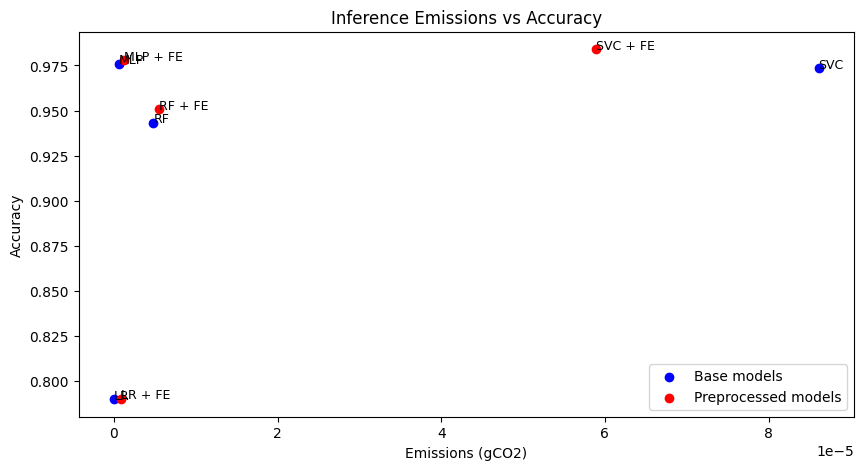

In [25]:
plt.figure(figsize=(10, 5))
# scatter plot of inference emissions vs accuracy
for i, (model_name, model_dict) in enumerate(base_models.items()):
    em = model_dict["carbon_emissions"]["inference"]  # correction
    acc = model_dict["score"]
    (
        plt.scatter(em, acc, color="blue")
        if i != 0
        else plt.scatter(em, acc, color="blue", label="Base models")
    )
    plt.text(em, acc, model_name, fontsize=9)

for i, (model_name, model_dict) in enumerate(preprocessed_models.items()):
    em = (
        model_dict["carbon_emissions"]["inference"]
        + model_dict["carbon_emissions"]["preprocess_inference"]
    )  # correction
    acc = model_dict["score"]
    (
        plt.scatter(em, acc, color="red")
        if i != 0
        else plt.scatter(em, acc, color="red", label="Preprocessed models")
    )
    plt.text(em, acc, model_name + " + FE", fontsize=9)

plt.xlabel("Emissions (gCO2)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Inference Emissions vs Accuracy")

plt.show()

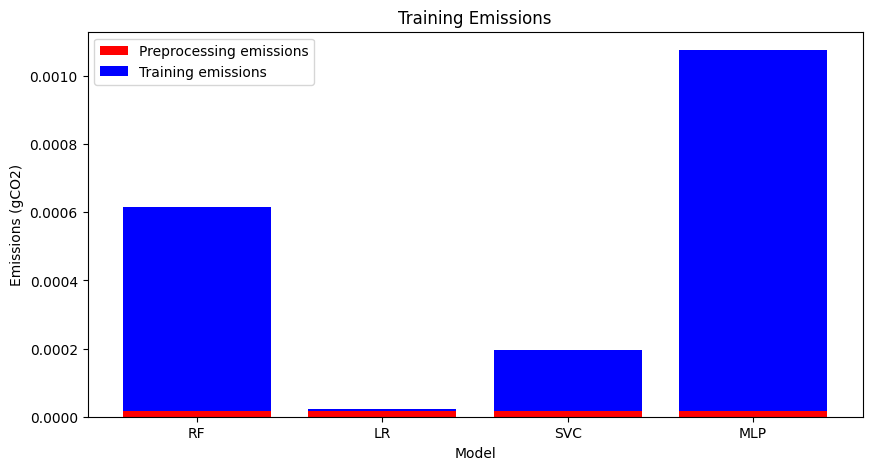

In [28]:
# barplot of training emissions in blue, and the additionnal emissions due to preprocessing in red

emissions = []
emissions_preprocess = []
model_names = []
bottom = 0  # initialize the starting point of the bars

for model_name, model_dict in base_models.items():
    emissions.append(model_dict["carbon_emissions"]["train"])
    emissions_preprocess.append(preprocess_emissions)
    model_names.append(model_name)

# barplot
plt.figure(figsize=(10, 5))
plt.bar(
    model_names,
    emissions_preprocess,
    bottom=0,
    color="red",
    label="Preprocessing emissions",
)
plt.bar(
    model_names,
    emissions,
    bottom=emissions_preprocess,
    color="blue",
    label="Training emissions",
)


plt.xlabel("Model")
plt.ylabel("Emissions (gCO2)")
plt.legend()
plt.title("Training Emissions")

plt.show()